In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. Será necesario incorporar características adicionales como el sentimiento o características léxicas.

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


**Nota 1**: El ejercicio propuesto es similar a los ejercicios de clasificación visto en clase, por lo que es importante que documentéis y expliquéis adecuadamente (con vuestras palabras) los procesos llevados a cabo en el ejercicio. No hacerlo puede llegar a penalizar hasta 1 punto en la calificación final.

**Nota 2**: Cualquier cálculo adicional a los vistos en clase (visualizaciones, nuevas características añadidas al modelo...) será valorado positivamente en la calificación.

## 0. Imports


In [ ]:
import sys
!{sys.executable} -m pip install contractions
!pip install spacy==3.2.1
!pip install emoji_extractor
from emoji_extractor.extract import Extractor
!python -m spacy download en_core_web_sm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
# Instalar la fuente Noto Color Emoji
!apt-get install -y fonts-noto-color-emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4
  Attempting uninstall: thinc
    Found existing inst

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


--2024-04-18 08:47:58--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allzip’

allzip                  [  <=>               ]  94.61K   419KB/s    in 0.2s    

2024-04-18 08:47:59 (419 KB/s) - ‘allzip’ saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-noto-color-emoji
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,944 kB of archives.
After this operation, 11.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import contractions

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
dataset = load_prepare_data(path_data)

In [ ]:
dataset.head(4)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0


## 2. Análisis exploratorio

Para empezar con el ejercicio propuesto vamos a comenzar con un primer analisis exploratorio del dataset. Llevar a cabo un análisis exploratorio de los documentos es un proceso más complejo que el análisis llevado a cabo en datos numéricos debido a que la naturaleza no numérica del texto implica dificultades para el cálculo de estadísticos típicos como la media o desviación típica. Sin embargo, si podremos analazar otra serie de caracteristicas:

In [ ]:
#Comprobación del nº de filas y columnas del dataset
dataset.shape

(47692, 2)

El dataset está compuesto por 47.692 documentos y 2 columnas, que como se puede ver en el el "head()" del apartado anterior son los tweets y la varibale objetivo cyberbullyng.

Procedemos a comprobar el numero de categorias y valores que tenemos de la varibale objetivo:

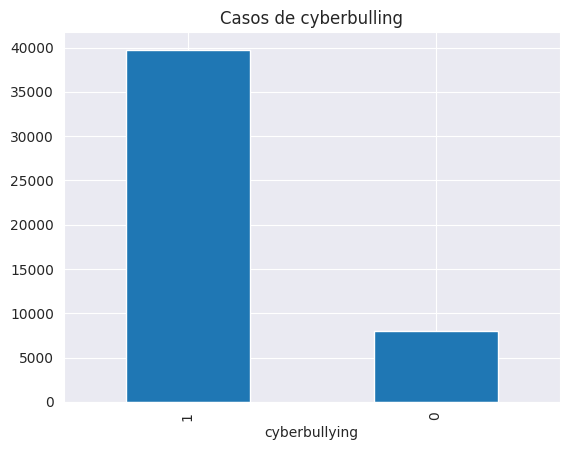

In [ ]:
# Comprobamos el numero de casos y valores de la variable objetivo cyberbullying
dataset.cyberbullying.value_counts().plot(kind='bar')
plt.title('Casos de cyberbulling')
plt.show()


La varibale objetivo es bimodal y hay un claro desbalanceo, un considerable numero menor de 0 (casos en los que no hay cyberbullyng) supone un problema para el modelo que queremos crear por lo que más adelante aplicaremos algunas tecnicas para solventarlo

Comprobamos si hay valores nulos:

In [ ]:
# Checkeamos valores nulos en el datset
dataset.isnull().sum()

tweet_text       0
cyberbullying    0
dtype: int64

Perfecto! no hay valores nulos en ninguna de las columnas.

Debido a la naturaleza de la red social, los retweets pueden provocar que haya tweets duplicados, comprobamos que no los haya tampoco y en caso de haber procedemos a eliminarlos:

In [ ]:
#Comprobamos cuantos duplicados hay
dataset.duplicated(subset=["tweet_text"]).sum()

1675

In [ ]:
#Eliminamos duplicados
dataset = dataset.drop_duplicates(subset=["tweet_text"])

In [ ]:
#Volvemos a comprobar que se haya realizado la eliminación correctamente
dataset.duplicated(subset=["tweet_text"]).sum()

0

In [ ]:
# Comprobamos que el numero de documentos ha disminuido acorde con la eliminación de duplicados
dataset.shape

(46017, 2)

### **Analisis de longuitudes de los tweets**

Procedemos a comprobar y a añadir como caracteristica la longitud de cada tweets:

In [ ]:
#Añadimos la columna "tweet_len" como la longuitud de cada tweet
dataset["tweet_len"] = dataset["tweet_text"].apply(lambda x: len(x))

<Figure size 1400x1200 with 0 Axes>

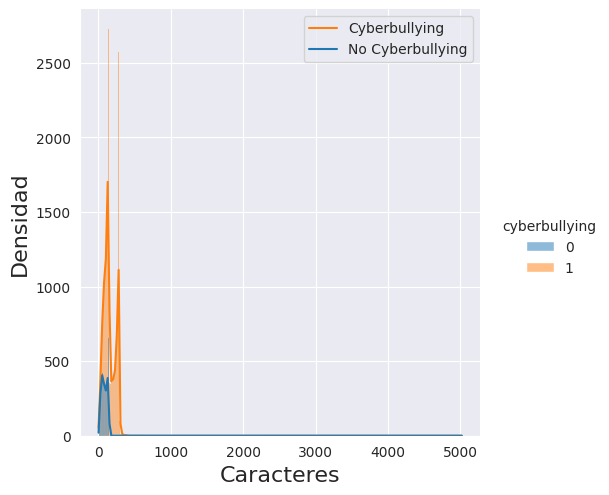

In [ ]:
# Graficamos las longitudes de los documentos asociados a cada categoría
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="tweet_len", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.show()

Lo primero que llama la atención es que hay unos pocos tweets demasiado largos... Cada tweet puede tener como maximo 280 caracteres desde 2017, el límite anterior a este año eran 140 caracteres. Los datos pertenecen al año 2020 por lo que vamos a interpretar que como maximo cada tweet pueda tener 280 caracteres.

Sin embargo, primero de todo, vamos a ver que problema puede estar habiendo con esos tweets tan largos:

In [ ]:
# Filtramos los tweets demasiado largos e imprimmos por pantalla alguno para intentar inferir el problema
tweets_largos = dataset.loc[dataset['tweet_len'] > 280]
print(tweets_largos.iloc[0,0])


@EurekAlertAAAS: Researchers push to import top anti-bullying program to US schools http://t.co/UPZrMbl
@NomCookiesNom Instead of personal attacks, maybe you can explain why there are more than 100 Islamic terrorist groups.
@_Finessinfool yea imma bring in tomorrow
#mkr I think Colin might not be a fan of the meatballs.
@KatieBatterman yeah, we should talk. I was just about to send an email over to them right before I was told it was retracted.
I'm not a fan of the bears from QLD. 💩 #MKR
@eDRoaCH @orvtech this isn't de-anonymizing. the phone # wouldn't necessarily be stored. no names would be required.
@owlcity hey adam :) I've been to 2 of your concerts &amp; haven't been allowed to meet you. when will I be able to?
Me: The boat or the thing that melts Nazi faces?
Watching a video of the snowman play from primary school! Go Tanners Wood haha #oldschool
@eranubuwah @352_7538 Taking tiny villages while loosing major cities like Tikrit.
Sofro Bulling No Chat u_u
@greenlinerzjm The best M

In [ ]:
#Chequeamos la forma de estos tweets
print(tweets_largos.shape) #

(703, 3)


Vemos que hay 703 tweets con este problema

Como sospechabamos, vemos que en realidad no se corresponden con un unico tweet y la proporción de estos tweets es el 1.5%, los consideramos como outliers y procedemos a eliminarlos.

Parece que se hayan encadenado diferentes tweets por error. No parecen que la razón sea que esos documentos pertenezcan a hilos, ya que no vemos que estes relacionados.

 Podríamos separarlos y añadirlos al dataset, sin embargo, habría que indicar de alguna forma la varibale objeto de cada uno. Lo cual se podría hacer pero no merece la pena siendo una incidencia tan pequeña. Vamos a eliminarlos directamente para que nuestro modelo no aprenda de ellos ya que no es posible que hayan tweets tan largos.

In [ ]:
# Eliminamos los tweets largos
dataset = dataset.drop(tweets_largos.index, axis=0)

In [ ]:
# Comprobamos que el numero de documentos ha disminuido acorde con la eliminación de duplicados
dataset.shape

(45314, 3)

<Figure size 1400x1200 with 0 Axes>

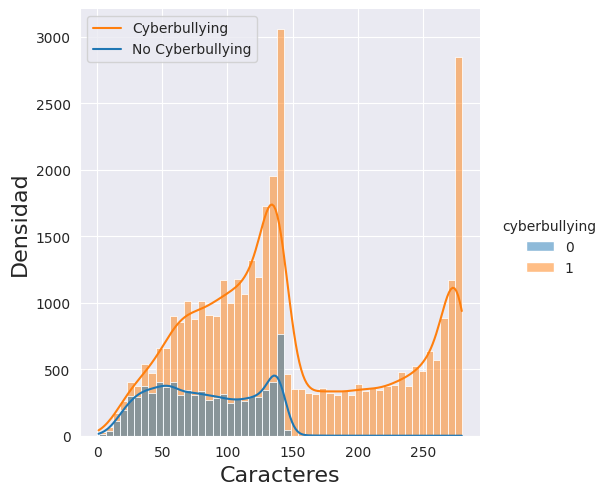

In [ ]:
# Volvemos a graficar las longitudes de los documentos asociados a cada categoría
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="tweet_len", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.show()



```
# Tiene formato de código
```

En el grafico anterior, con los outliers fuera, se puede observar de nuevo hay un mayor numero de documentos con bullying que sin él.

Especialmente, se observa esto en los tweets con mas de 140-150 carcteres, lo cual hace pensar que a partir de dichos nº de caracteres la probabilidad de que sea bullying es muy alta.

No me gusta nada ese comportamiento ya que en la realidad existen muchos casos en los que el numeros de caracteres es muy alto y no por ello deben de ser de odio. Esto nos indica que los datos pueden estar sesgados.

La distribución en los casos de ciberbullying presenta una mayor proporción a medida que los tweets son mas largos, llegando a un pico alrededor de los 140-150 caracteres (la mitad del maximo de caracteres permitidos). Despúes de ahí baja y vuelve a crecer hasta un segundo maximo en el maximo de caracteres.

En el caso de NO cyberbulling la muestra cae en picado a partir de los 140-150 caracteres. La forma de la distribución digamos que es bastante estable.

In [ ]:
dataset["+150 caract"] = dataset['tweet_text'].apply(lambda x: 1 if len(x) > 150 else 0)

### **Análisis de contenido de los tweets**

A continuación, veremos que palabras son las mas utilizadas a priori de normalizarlas. Más adelante lo volveremos a hacer para ver como cambian

In [ ]:
# Separamos dataset en 2 por la varibale objetivo
txt_cat0 = ",".join(dataset[dataset.cyberbullying==0].tweet_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying==1].tweet_text.to_list())

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Definimos la nube de palabras
en_stopwords = stopwords.words('english')

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)

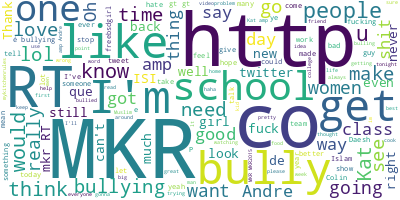

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

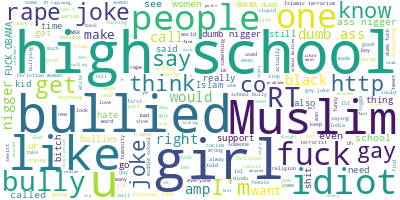

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

En el wordcloud de la categoría 0 se observa que hay una alta presencia de URLs (presencia de https y co), así como de school y bully . Son términos que no muestran opiniones.

En el wordcloud asociado a la categoría 1 no se observa el término https (es decir que habrá menos URLs en el contenido). Aparecen adjetivos  como fucking, idiot, muslim, gay black, que pueden ser adjetivos usados de forma despectiva para meterse con alguien.

En general, se obserban similitudes en los témrinos más presentes en ambos grupos como school y bully, pero diferencias en el resto del contenido teniendo el segundo palabrotas.

### **Analisis de Emojis**

Vamos a hacer un pequeño análisis sobre los emojis en el conjunto de datos de trabajo. En primer lugar vamos a ver el número de documentos que tienen emojis:

In [ ]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

Creamos una varibale nueva con los emojis de cada tweet:

In [ ]:
dataset["emojis"] = dataset["tweet_text"].apply(lambda x: extract_emojis(x))

Calculamos los documentos que tiene emojis y los que no

In [ ]:
filas_con_icono = dataset[dataset['emojis'].apply(lambda x: len(x) >= 1)]
filas_sin_icono = dataset[dataset['emojis'].apply(lambda x: len(x) ==0)]

# Imprimir el resultado
print("Número de filas con al menos un icono:", len(filas_con_icono))
print("Número de filas sin iconos:", len(filas_sin_icono))

Número de filas con al menos un icono: 408
Número de filas sin iconos: 44906


Se observa que en torno el 1% de documentos tiene emojis. Esto indica que esta información a lo mejor no es extremadamente útil, sin embargo, vamos a tenerlo en cuenta. Vamos a ver el uso de emojis en cada una de las categorías del dataset:

In [ ]:
# Filtrar las filas con icono y cyberbullying == 1
filas_con_icono_y_molestia_1 = filas_con_icono[filas_con_icono['cyberbullying'] == 1].emojis.to_list()

# Filtrar las filas con icono y cyberbullying == 0
filas_con_icono_y_molestia_0 = filas_con_icono[filas_con_icono['cyberbullying'] == 0].emojis.to_list()

Unimos en una lista no anidada todos los elementos de cada lista:

In [ ]:
filas_con_icono_y_molestia_1 = [item for sublist in filas_con_icono_y_molestia_1 for item in sublist]
filas_con_icono_y_molestia_0 = [item for sublist in filas_con_icono_y_molestia_0 for item in sublist]

Visualizamos el top-10 de resultados en un barplot:

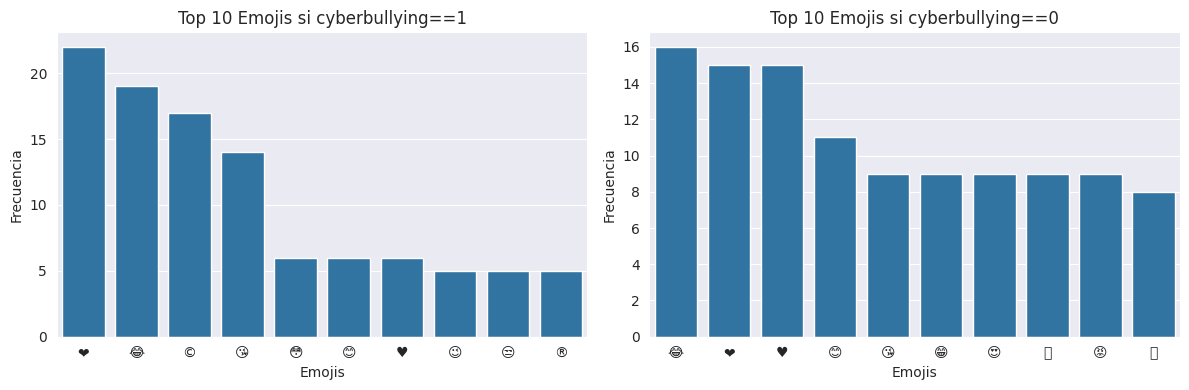

In [ ]:
from collections import Counter
from matplotlib import font_manager

freq_icono_y_molestia_1 = Counter(filas_con_icono_y_molestia_1)
freq_icono_y_molestia_0 = Counter(filas_con_icono_y_molestia_0)

emojis1, frecuencias_elementos1 = zip(*sorted(freq_icono_y_molestia_1.items(), key=lambda x: x[1], reverse=True)[:10])
emojis0, frecuencias_elementos0 = zip(*sorted(freq_icono_y_molestia_0.items(), key=lambda x: x[1], reverse=True)[:10])


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Barplot 1
sns.barplot(x=emojis1, y=frecuencias_elementos1, ax=axes[0])
axes[0].set_xlabel('Emojis')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Top 10 Emojis si cyberbullying==1')

# Barplot 2
sns.barplot(x=emojis0, y=frecuencias_elementos0, ax=axes[1])
axes[1].set_xlabel('Emojis')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Top 10 Emojis si cyberbullying==0')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la imagen
plt.show()

El resultado es llamativo. En ambos casos aparecen corazones, cosa que a priori no es muy normal que digamos. Podría deberse a sarcasmo en el caso de haber bullying. También vemos risas en ambos. Por ultimo, vemos que hay simbolos de una C y R que puede deberse a que se utilicen para que el algoritmo de twiter no detecte insultos o palabras malsonantes. En todo caso, un corpotamiento raro y en el que no se saca nada claro

## 3. Preprocesado y Normalización

### **Normalización**

En primer lugar eliminaremos espacios extras del texto y transformaremos todos los caracteres a minúsculas. Tambien lo meteremos en una varibale nueva llamada normalized:

In [ ]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

In [ ]:
# Espacios
dataset["normalized"] = dataset["tweet_text"].apply(lambda x: eliminar_espacios(x))
dataset["normalized"] = dataset["normalized"].apply(lambda x: texto_to_lower(x))

Como en los textos pueden haber contracciones de palabras, siglas y diferentes expresiones y diferentes slangs para algunos ambitos procederemos a reemplazar dichas expresiones por su forma canonica mediante la libreria contractions:

In [ ]:
# Reemplazar contractions usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    return contractions.fix(text, slang=True)

In [ ]:
dataset["normalized"] = dataset["normalized"].apply(lambda x: replace_contraction(x))

Depués normalizamos URLs (tokens que comienzan por https:), menciones de twitter (tokens que comienzan por @) y números. Aunque existen formas muy eficientes si se buscan patrones en el texto con expresiones regulares, vamos a optar por tokenizar el documento, y en función de las características del token sustiuiremos el token o lo dejaremos igual.

In [ ]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento)

    # Reemplazar URLs, menciones de Twitter y números por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].startswith("@"):
            palabras[i] = "MENTION"
        elif palabras[i].isdigit():
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

Aplicamos la función anterior al texto:

In [ ]:
dataset["normalized"] = dataset["normalized"].apply(lambda x: normalizar_tokens(x))

Por último llevamos a cabo la lematización, eliminación de puntuación y stopwords y lo guaardamos en una nueva columna:

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar símbolos de puntuación y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

In [ ]:
dataset["preprocessed_text"] = dataset["normalized"].apply(lambda x: lematizar_eliminacion_tokens(x))

In [ ]:
dataset.head()

,tweet_text,cyberbullying,tweet_len,+150 caract,emojis,normalized,preprocessed_text
0,"In other words #katandandre, your food was cra...",0,61,0,[],"in other words #katandandre , your food was cr...",word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,0,[],why is #aussietv so white ? #mkr #theblock #im...,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,0,[],MENTION a classy whore ? or more red velvet cu...,MENTION classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,0,[],"MENTION meh . :p thanks for the heads up , but...",MENTION meh thank head concerned another angry...
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,0,[],MENTION this is an isis account pretending to ...,MENTION isis account pretend kurdish account l...


Una vez procesado el texto, vamos a rehacer los word clouds para interpretar mejor el contenido de éste con el texto ya preprocesado y visualizar el correcto funcionamiento del proceso:

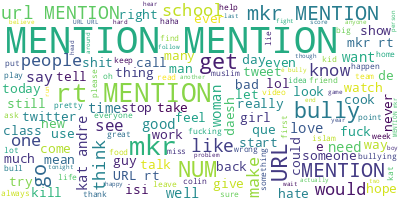

In [ ]:
txt_cat0 = ",".join(dataset[dataset.cyberbullying==0].preprocessed_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying==1].preprocessed_text.to_list())
#
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

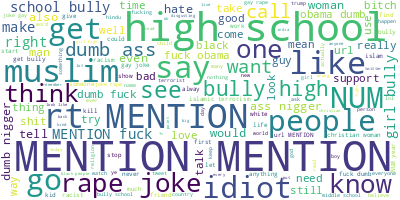

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

En abos casos las menciones so el elemento más representativo. Seguimos viendo insultos y algunas palabras sensible a ser utilizada de forma despectiva en el caso de los 1. En los casos de los 0 se aprecian varias siglas que nuestra libreria para reeemplazar no ha sabido hacerlo.

Una vez preprocesado, podríamos calcular alguna característica adicional, como el número de URLs o menciones:

In [ ]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])

In [ ]:
dataset["num_mention"] = dataset["preprocessed_text"].apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["preprocessed_text"].apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["preprocessed_text"].apply(lambda x: token_appearance(x, token="NUM"))

### **Características de sentimiento**

Además de las características anteriormente calculadas, vamos a llevar a cabo el cálculo de 5 características adicionales.

En primer lugar, debemos preprar un diccionario de emojis:

In [ ]:
# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

#Cargamos el diccionariod emojis
emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

In [ ]:
#Cargamos el diccionariod emojis
#emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

Después, calculamos características asociadas a los emoticonos utilizados en los documentos utilizando la siguiente función get_emoji_sentiment:

In [ ]:
def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e:
      continue

  if len(lista)>=1:
    longitud = len(lista)
  else:
    longitud =1
  return output/ longitud

In [ ]:
dataset["sent_emoji_pos"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "positive"))
dataset["sent_emoji_neu"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "neutral"))
dataset["sent_emoji_neg"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "negative"))

Adicionalmente, vamos a calcular el sentimiento asociado a los textos de los documentos utilizando TextBlob:

In [ ]:
from textblob import TextBlob
dataset["tweet_sentiment_polarity"] = dataset["preprocessed_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
dataset["tweet_sentiment_subjectivity"] = dataset["preprocessed_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
dataset.loc[dataset['num_URLS'] == 1, :].head()


,tweet_text,cyberbullying,tweet_len,+150 caract,emojis,normalized,preprocessed_text,num_mention,num_URLS,num_NUM,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_sentiment_polarity,tweet_sentiment_subjectivity
10,@Jord_Is_Dead http://t.co/UsQInYW5Gn,0,36,0,[],MENTION URL,MENTION URL,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
11,The Bully flushes on KD http://twitvid.com/A2TNP,0,48,0,[],the bully flushes on kd URL,bully flush kd URL,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
13,RT @Kurdsnews: Turkish state has killed 241 ch...,0,138,0,[],rt MENTION : turkish state has killed NUM chil...,rt MENTION turkish state kill NUM child last N...,1,1,2,0.000000,0.000000,0.000000,0.000000,0.066667
18,"Best pick up line? Hi, you're cute... ?: I lov...",0,136,0,[],"best pick up line ? hi , you are cute ... ? : ...",good pick line hi cute love people call james ...,0,1,0,0.000000,0.000000,0.000000,0.566667,0.733333
21,Kids Love😘❤ @ Mohamad Bin Zayed City مدينة محم...,0,76,0,"[😘, ❤]",kids love 😘 ❤ MENTION mohamad bin zayed city م...,kid love MENTION mohamad bin zaye city مدينة م...,1,1,0,0.772423,0.179074,0.048503,0.500000,0.600000


## 4. Vectorización

Despues de haber preprocesado el texto y haber preparado algunas caracteristicas extras para añadirlas más tarde vamos a vectorizar el texto para que los algoritmos puedan aprender de ello.

Hay varias formas de hacerlo, sin embargo, nos decantamos con hacer una vectorización TF-IDF ......

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(dataset["preprocessed_text"])

In [ ]:
vector_data

<45314x406 sparse matrix of type '<class 'numpy.float64'>'
	with 372367 stored elements in Compressed Sparse Row format>

El resultado del proceso de vectorización nos devuelve vectores de tamaño 406

### Incorporación de características adicionales

A lo largo del notebook hemos ido calculando y añadiendo coumans al dataset como características adicionales que podrían ayudar al clasificador a tener mejor rendimiento. Las vamos a añadir al resultado de la vectorización.


La forma más sencilla de hacer esto es utilizar la librería scipy y generar una matriz sparse, comprensible por scikit-learn, que contenga tanto las características de TF-IDF como las calculadas manualmente.

En primer lugar, debemos seleccionar el conjunto de variables que queremos considerar en el entrenamiento. PAra ello hacemos uso del selector `dataframe[["nombre_columna1", "nombre_columna2"]]`:

In [ ]:
extra_features = dataset[['num_mention','num_URLS','num_NUM',
                          'tweet_sentiment_subjectivity','tweet_sentiment_polarity',
                          'sent_emoji_pos','sent_emoji_neg','sent_emoji_neu']]

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). Esta unión nos generará una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [ ]:
import scipy as sp
import numpy as np

# Extraemos las etiquetas y las asignamos a la variable y
y = dataset["cyberbullying"].values.astype(np.float32)
# Unimos las características TFIDF con las características previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

## 5. Entrenamiento y evaluación de modelos


Procedemos a dividir las matrices X e y en training y test para probar varios modelos y elegir el que mejor generalice.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    stratify = y)
print(X_train.shape)
print(X_test.shape)

(33985, 414)
(11329, 414)


Para poder elegir que modelo utilizas, se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados.

La función hace un KFold y evalua diferentes modelos con una métrica de evblauación

In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un StratifiedKFold
          KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB()),
         ("Tree", tree.DecisionTreeClassifier()),
         ("Random Forest",RandomForestClassifier(n_estimators=50, random_state=1))
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, vector_data.toarray(), y)

Metric: accuracy , KFold 
Logistic: 0.854637 (0.002512) 
Metric: accuracy , KFold 
GaussianNB: 0.604206 (0.003585) 
Metric: accuracy , KFold 
Tree: 0.847310 (0.005036) 
Metric: accuracy , KFold 
Random Forest: 0.864810 (0.003141) 


([array([0.85258744, 0.85589761, 0.85236677, 0.85898709, 0.85334363]),
  array([0.59913936, 0.6060907 , 0.60090478, 0.60620104, 0.60869565]),
  array([0.84795322, 0.84927728, 0.8530288 , 0.84839457, 0.8378945 ]),
  array([0.86538674, 0.86825554, 0.86362132, 0.86737283, 0.85941293])],
 ['Logistic', 'GaussianNB', 'Tree', 'Random Forest'])

Observamos un mejor funcionamiento con el regresor logístico, que será con el que intentaremos afinar los hiperparámetros:

### Tunning del modelo seleccionado

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV. Vamos a utilizar una métrica de búsqueda basada en accuracy (por probar)

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado:

In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.854289 usando los parámetros {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=10, penalty="l2", solver = "newton-cg")
model.fit(X_train,y_train)

LogisticRegression(C=10, solver='newton-cg')

[[ 898 1086]
 [ 514 8831]]
              precision    recall  f1-score   support

         0.0       0.64      0.45      0.53      1984
         1.0       0.89      0.94      0.92      9345

    accuracy                           0.86     11329
   macro avg       0.76      0.70      0.72     11329
weighted avg       0.85      0.86      0.85     11329



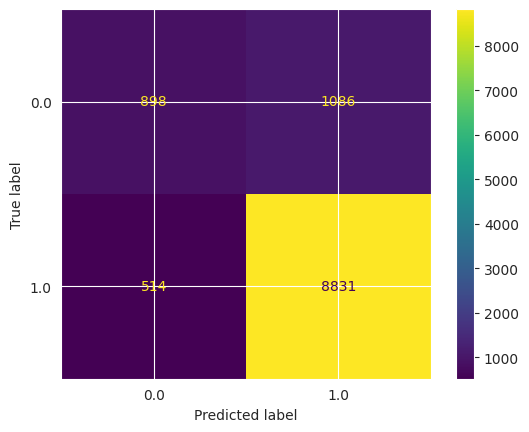

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

Acuracy bien pero no detecta bien los 0 debido a que el dataset esta muy desbalanceado. Procedemos a balancearlo

### Rebalanceo

Debido a que los datos están muy desbalanceados como hemos visto al principio del analisis exploratorio es necesario hacer un rebalnceo debido a que si no, el modelo es incapaz de predecir correctamente los valores de la clase minoritaria, en este caso los 0.

In [ ]:
# Cargamos
from imblearn.over_sampling import SMOTE
# Creamos objetos
sm = SMOTE(random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X_train, y_train)

Aplicamos el tuneado a los nuevos training y test por si estos cambian respecto a los no balanceados.

In [ ]:
grid_result = grid_search.fit(X_res, y_res)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.871286 usando los parámetros {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
model=LogisticRegression(C=100, penalty="l2", solver = "newton-cg")
model.fit(X_res,y_res)

LogisticRegression(C=100, solver='newton-cg')

[[1695  289]
 [1759 7586]]
              precision    recall  f1-score   support

         0.0       0.49      0.85      0.62      1984
         1.0       0.96      0.81      0.88      9345

    accuracy                           0.82     11329
   macro avg       0.73      0.83      0.75     11329
weighted avg       0.88      0.82      0.84     11329



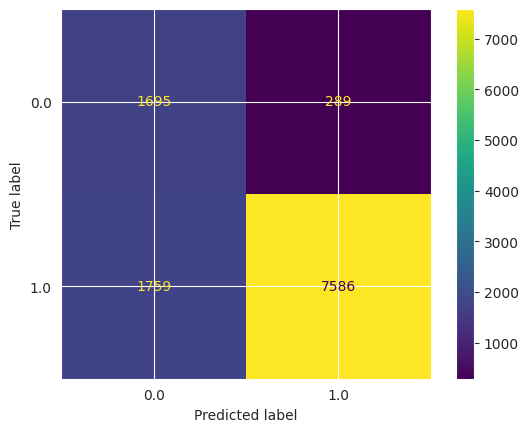

In [ ]:

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

### Importancia de características

In [ ]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

In [ ]:
# Obtener la importancia de las variables del modelo
importance = model.coef_[0]

In [ ]:
# Primero, emparejamos los nombres de las características con su importancia
features_importances = list(zip(X_columns, importance))

# Luego, ordenamos las características por importancia en orden descendente
features_importances_sorted = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Desempaquetamos las listas ordenadas
X_columns_sorted, importance_sorted = zip(*features_importances_sorted)


Feature: 0, Name: nigger, Score: 23.52940
Feature: 1, Name: islamic terrorism, Score: 20.28111
Feature: 2, Name: christian woman, Score: 19.41795
Feature: 3, Name: feminazi, Score: 18.67433
Feature: 4, Name: girl bully, Score: 14.55125
Feature: 5, Name: hindu, Score: 13.88874
Feature: 6, Name: gay joke, Score: 12.34994
Feature: 7, Name: radical, Score: 12.03740
Feature: 8, Name: bully middle, Score: 10.78894
Feature: 9, Name: bully high, Score: 10.65530
Feature: 10, Name: NUM, Score: -0.32187
Feature: 11, Name: tweet_sentiment_polarity, Score: -0.43259
Feature: 12, Name: num_mention, Score: -0.52294
Feature: 13, Name: middle school, Score: -0.78454
Feature: 14, Name: class, Score: -1.06849
Feature: 15, Name: num_URLS, Score: -1.35118
Feature: 16, Name: sent_emoji_neg, Score: -1.54863
Feature: 17, Name: mkr, Score: -1.63098
Feature: 18, Name: bullying, Score: -1.70902
Feature: 19, Name: kat andre, Score: -8.10661


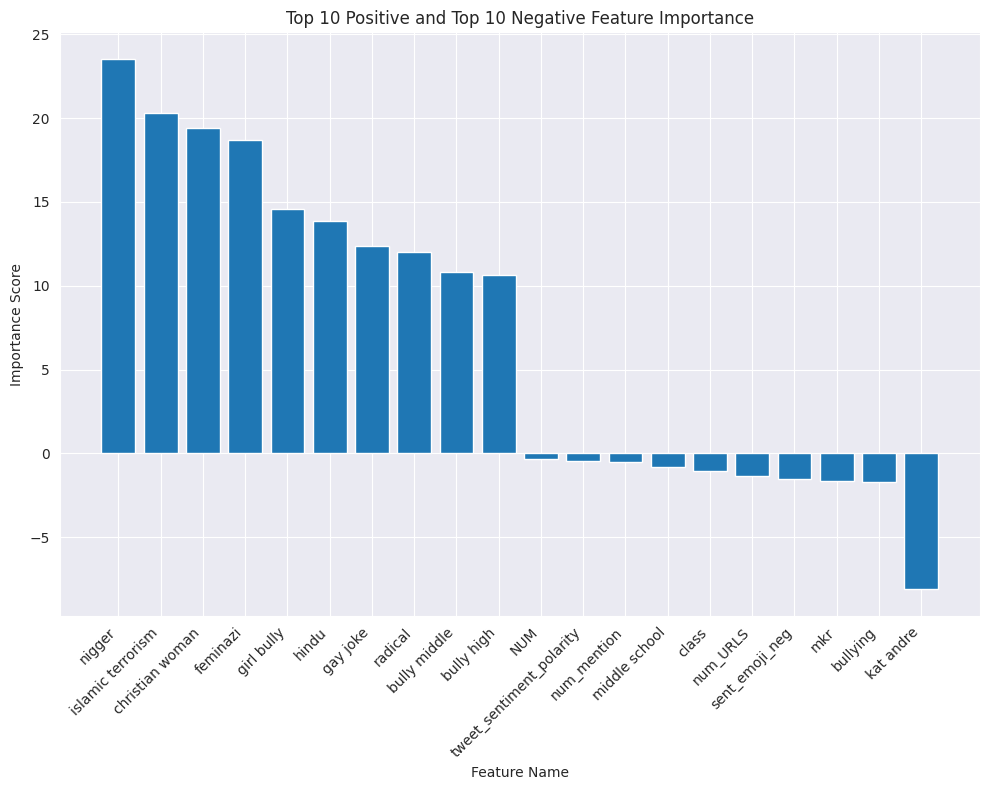

In [ ]:
# Seleccionamos solo las 10 más positivas y las 10 más negativas
top_features = X_columns_sorted[:10] + X_columns_sorted[-10:]
top_importance = importance_sorted[:10] + importance_sorted[-10:]

# Mostrar el número de la característica, con su nombre, y su score de importancia
for i, (feature, importance) in enumerate(zip(top_features, top_importance)):
    print('Feature: %0d, Name: %s, Score: %.5f' % (i, feature, importance))

# Crear el plot
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico según necesites
plt.bar(top_features, top_importance)  # Usar nombres de características ordenadas en el eje x

# Mejorar el gráfico
plt.xticks(rotation=45, ha="right")  # Rota los nombres en el eje x para mejor lectura
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Top 10 Positive and Top 10 Negative Feature Importance')
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el subplot(s) encaje en el área de la figura.

plt.show()